In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!echo '{"username":"anoudalfaydi","key":"fa3fb761694ee5e822bc738afd23861a"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d haithemhermessi/sanad-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/haithemhermessi/sanad-dataset
License(s): U.S. Government Works
sanad-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
import os
import zipfile
import tempfile
import shutil
import nltk
from nltk.corpus import stopwords
import re
import string
import nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Specify the path to your zip file
zip_path = '/content/sanad-dataset.zip'

# Create a temporary directory for extraction
extract_path = tempfile.mkdtemp()

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Rest of the code to process the extracted files into a DataFrame
data = []
categories = ["Culture", "Finance", "Medical", "Politics", "Religion", "Sports", "Tech"]

for category in categories:
    category_path = os.path.join(extract_path, category)
    for filename in os.listdir(category_path):
        file_path = os.path.join(category_path, filename)
        with open(file_path, 'r') as file:
            text = file.read()
        data.append({'Text': text, 'Category': category})

# Create the DataFrame
df = pd.DataFrame(data)

# Optionally, shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Once you are done with the DataFrame, delete the temporary directory and its contents
shutil.rmtree(extract_path)

# Print the DataFrame
print(df)

                                                    Text Category
0      أشاد مارتن فان رين، وزير الدولة للصحة والرعاية...  Medical
1      سيكون ستة أبطال سابقين في انتظار استئناف سعيهم...   Sports
2      أثبت أندريا بيرلو مجدداً أن انتقاله من ميلان إ...   Sports
3      يُعد الدكتور صلاح قنصوة بفكره وأسلوبه نسقاً خا...  Culture
4      القاهرة - "الخليج":أقرت لجنة المسرح في المجلس ...  Culture
...                                                  ...      ...
45495  انخفض مؤشر سوق الإمارات المالي الصادر عن هيئة ...  Finance
45496  للعام ال 14 على التوالي، تشارك مدينة دبي للإنت...     Tech
45497  أنعش نيوكاسل آماله بالبقاء في الدرجة الممتازة ...   Sports
45498  شهد جناح وزارة التربية والتعليم المشارك في الم...  Culture
45499  دبي- "الخليج":نظمت إدارة مركز عمليات الطوارئ و...  Medical

[45500 rows x 2 columns]


In [ ]:
df.head()

,Text,Category
0,أشاد مارتن فان رين، وزير الدولة للصحة والرعاية...,Medical
1,سيكون ستة أبطال سابقين في انتظار استئناف سعيهم...,Sports
2,أثبت أندريا بيرلو مجدداً أن انتقاله من ميلان إ...,Sports
3,يُعد الدكتور صلاح قنصوة بفكره وأسلوبه نسقاً خا...,Culture
4,"القاهرة - ""الخليج"":أقرت لجنة المسرح في المجلس ...",Culture


In [ ]:
df["Category"].value_counts()

Category
Medical     6500
Sports      6500
Culture     6500
Religion    6500
Tech        6500
Politics    6500
Finance     6500
Name: count, dtype: int64

In [ ]:
unique_categories = df['Category'].unique()
print(unique_categories)


['Medical' 'Sports' 'Culture' 'Religion' 'Tech' 'Politics' 'Finance']


In [ ]:
df.shape

(45500, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45500 entries, 0 to 45499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      45500 non-null  object
 1   Category  45500 non-null  object
dtypes: object(2)
memory usage: 711.1+ KB


In [ ]:
print('is null ? :  \n **************** ', df.isnull().sum())
print('data info : \n **************** ', df.info())
print('is duplicated : \n ************* ', df.duplicated().sum())
print('data shape \n :  ************** ', df.shape)

is null ? :  
 ****************  Text        0
Category    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45500 entries, 0 to 45499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      45500 non-null  object
 1   Category  45500 non-null  object
dtypes: object(2)
memory usage: 711.1+ KB
data info : 
 ****************  None
is duplicated : 
 *************  15
data shape 
 :  **************  (45500, 2)


In [ ]:
#drop missing value
df.dropna(inplace=True)

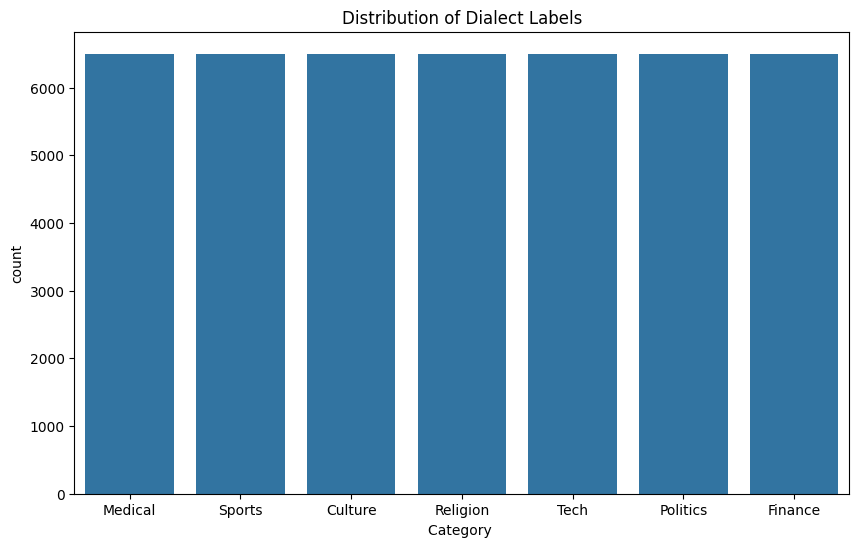

In [ ]:
# Check the distribution of dialect labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Dialect Labels')
plt.xlabel('Category ')
plt.show()

#PREPROCCISING

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
arabic_stopwords = set(stopwords.words("arabic"))
def remove_stop_words(text):
    Text = [i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

In [ ]:
df['Text'] = df['Text'].apply(remove_stop_words)

In [ ]:
df.head()

,Text,Category
0,أشاد مارتن فان رين، وزير الدولة للصحة والرعاية...,Medical
1,سيكون أبطال سابقين انتظار استئناف سعيهم للحصول...,Sports
2,أثبت أندريا بيرلو مجدداً انتقاله ميلان يوفنتوس...,Sports
3,يُعد الدكتور صلاح قنصوة بفكره وأسلوبه نسقاً خا...,Culture
4,"القاهرة - ""الخليج"":أقرت لجنة المسرح المجلس الأ...",Culture


In [ ]:
def Removing_non_arabic(text):
    #text = re.sub('[A-Za-z]+',' ',text)
    #this removes any non-arabic charaters and not only English letters
    text =re.sub(r'[^0-9\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD.0-9٠-٩]+', ' ',text)

    return text
df.Text=df.Text.apply(lambda text : Removing_non_arabic(text))

In [ ]:
df.head()

,Text,Category
0,أشاد مارتن فان رين، وزير الدولة للصحة والرعاية...,Medical
1,سيكون أبطال سابقين انتظار استئناف سعيهم للحصول...,Sports
2,أثبت أندريا بيرلو مجدداً انتقاله ميلان يوفنتوس...,Sports
3,يُعد الدكتور صلاح قنصوة بفكره وأسلوبه نسقاً خا...,Culture
4,القاهرة الخليج أقرت لجنة المسرح المجلس الأعلى ...,Culture


In [ ]:
def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text
df.Text=df.Text.apply(lambda text : Removing_numbers(text))


In [ ]:
df.head()

,Text,Category
0,أشاد مارتن فان رين، وزير الدولة للصحة والرعاية...,Medical
1,سيكون أبطال سابقين انتظار استئناف سعيهم للحصول...,Sports
2,أثبت أندريا بيرلو مجدداً انتقاله ميلان يوفنتوس...,Sports
3,يُعد الدكتور صلاح قنصوة بفكره وأسلوبه نسقاً خا...,Culture
4,القاهرة الخليج أقرت لجنة المسرح المجلس الأعلى ...,Culture


In [ ]:
def remove_diacritics(text):
    arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', str(text))
    return text
df.Text=df.Text.apply(lambda text : remove_diacritics(text))


In [ ]:
df.head()

,Text,Category
0,أشاد مارتن فان رين، وزير الدولة للصحة والرعاية...,Medical
1,سيكون أبطال سابقين انتظار استئناف سعيهم للحصول...,Sports
2,أثبت أندريا بيرلو مجددا انتقاله ميلان يوفنتوس،...,Sports
3,يعد الدكتور صلاح قنصوة بفكره وأسلوبه نسقا خاصا...,Culture
4,القاهرة الخليج أقرت لجنة المسرح المجلس الأعلى ...,Culture


In [ ]:
def remove_adjacent_punctuation(text):
    # Define a regular expression pattern to match specific Arabic punctuation marks adjacent to words
    adjacent_punctuation_pattern = r'(\w)([،؛؟!.,:؛])(\s|$)'

    # Replace matched patterns with the adjacent word characters, effectively removing the punctuation marks
    text = re.sub(r'[،؛؟!.,:؛]', '', text)##------------> I edited this line!
                                          ## This is a better way to remove puncuations.
                                          ## The previous method ignores a situation when there is a consecutive punctuations (it will remove the first punctuation only).

    # Remove additional punctuation marks such as parentheses, slashes, hyphens, and quotation marks
    text = re.sub(r'[()//\\\-«»]', '', text)

    return text

df.Text = df.Text.apply(lambda text: remove_adjacent_punctuation(text))

In [ ]:
df.head()

,Text,Category
0,أشاد مارتن فان رين وزير الدولة للصحة والرعاية ...,Medical
1,سيكون أبطال سابقين انتظار استئناف سعيهم للحصول...,Sports
2,أثبت أندريا بيرلو مجددا انتقاله ميلان يوفنتوس ...,Sports
3,يعد الدكتور صلاح قنصوة بفكره وأسلوبه نسقا خاصا...,Culture
4,القاهرة الخليج أقرت لجنة المسرح المجلس الأعلى ...,Culture


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df.shape

(45485, 2)

In [ ]:
df

,Text,Category
0,أشاد مارتن فان رين وزير الدولة للصحة والرعاية ...,Medical
1,سيكون أبطال سابقين انتظار استئناف سعيهم للحصول...,Sports
2,أثبت أندريا بيرلو مجددا انتقاله ميلان يوفنتوس ...,Sports
3,يعد الدكتور صلاح قنصوة بفكره وأسلوبه نسقا خاصا...,Culture
4,القاهرة الخليج أقرت لجنة المسرح المجلس الأعلى ...,Culture
...,...,...
45495,انخفض مؤشر سوق الإمارات المالي الصادر هيئة الأ...,Finance
45496,للعام ال التوالي تشارك مدينة دبي للإنترنت كشر...,Tech
45497,أنعش نيوكاسل آماله بالبقاء الدرجة الممتازة وعم...,Sports
45498,شهد جناح وزارة التربية والتعليم المشارك المعرض...,Culture


#LSTM_Deep Learning

In [ ]:
# Separate the features (X) and the target variable (y)
X = df['Text'].values
y = df['Category'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (31839,) (31839,)
Testing set shape: (13646,) (13646,)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
X_train_tokens =  tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
# Padding sequences
max_sequence_length = 100
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_sequence_length, padding='post')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
embedding_dim = 300
num_classes = 7  # Update this with the correct number of classes in your data

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Update the number of units to match the number of classes

# Compile model: assign loss & optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          113739000 
                                                                 
 lstm (LSTM)                 (None, 256)               570368    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
label_train = label_encoder.fit_transform(y_train)
label_train = to_categorical(label_train)
label_test = label_encoder.transform(y_test)
label_test = to_categorical(label_test)


In [ ]:
history = model.fit(X_train_pad, label_train, epochs=5, batch_size=64, validation_data=(X_test_pad, label_test), callbacks=[early_stopping])

Epoch 1/5
498/498 [==============================] - 77s 145ms/step - loss: 1.1306 - accuracy: 0.5098 - val_loss: 0.7357 - val_accuracy: 0.6740
Epoch 2/5
498/498 [==============================] - 42s 84ms/step - loss: 0.8007 - accuracy: 0.7180 - val_loss: 0.6056 - val_accuracy: 0.8152
Epoch 3/5
498/498 [==============================] - 29s 59ms/step - loss: 0.2704 - accuracy: 0.9253 - val_loss: 0.2369 - val_accuracy: 0.9386
Epoch 4/5
498/498 [==============================] - 25s 51ms/step - loss: 0.1178 - accuracy: 0.9747 - val_loss: 0.2353 - val_accuracy: 0.9427
Epoch 5/5
498/498 [==============================] - 25s 50ms/step - loss: 0.0584 - accuracy: 0.9869 - val_loss: 0.2905 - val_accuracy: 0.9382


In [ ]:
loss, accuracy = model.evaluate(X_test_pad, label_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

427/427 [==============================] - 2s 5ms/step - loss: 0.2905 - accuracy: 0.9382
Test Loss: 0.29045578837394714
Test Accuracy: 0.9381503462791443


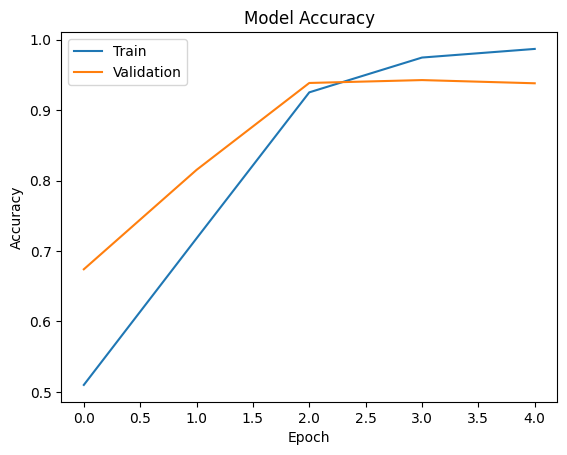

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_config = model.get_config()
print(model_config)

{'name': 'sequential', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 100), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'embedding_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Embedding', 'config': {'name': 'embedding', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 100), 'input_dim': 379130, 'output_dim': 300, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': 100}, 'registered_name': None, 'build_config': {'input_shape': (None, 100)}}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backward

In [ ]:
learning_rate = model.optimizer.learning_rate.numpy()
print(learning_rate)

0.001


In [ ]:
import time

start_time = time.time()
history
end_time = time.time()

training_time = end_time - start_time
print(training_time)

9.560585021972656e-05


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Predict labels for the test set
import numpy as np
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_classes = np.argmax(label_test, axis=1)

427/427 [==============================] - 2s 3ms/step


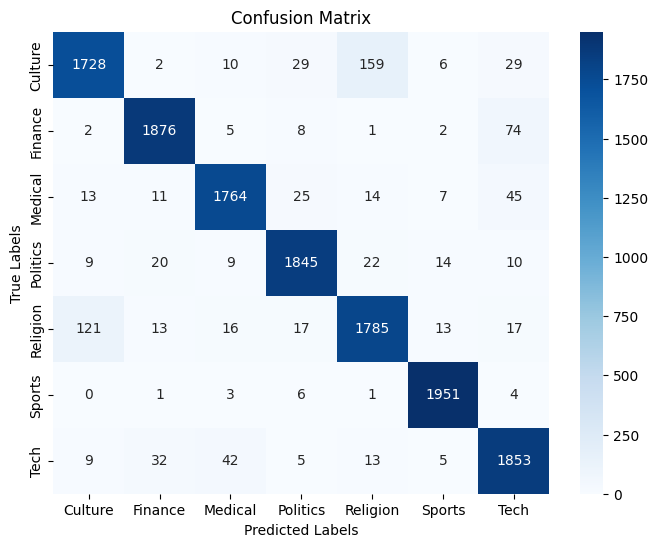

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Define class labels
class_names = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
class_names = label_encoder.classes_
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Culture       0.92      0.88      0.90      1963
     Finance       0.96      0.95      0.96      1968
     Medical       0.95      0.94      0.95      1879
    Politics       0.95      0.96      0.95      1929
    Religion       0.89      0.90      0.90      1982
      Sports       0.98      0.99      0.98      1966
        Tech       0.91      0.95      0.93      1959

    accuracy                           0.94     13646
   macro avg       0.94      0.94      0.94     13646
weighted avg       0.94      0.94      0.94     13646



#Naive bays

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model2 = MultinomialNB()
# Train the model with dense data
model.alpha = 0.5
model.fit_prior = False
model.class_prior = [0.3, 0.7]
start_time = time.time()
model2.fit(X_train_tfidf, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")
# Predict using the trained model
predicted = model2.predict(X_test_tfidf)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy}')

Training time: 0.16193366050720215 seconds
Accuracy: 0.9575699838780595


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, auc ,classification_report

In [ ]:
report = classification_report(y_test, predicted)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1963
           1       0.99      0.93      0.96      1968
           2       0.94      0.98      0.96      1879
           3       0.97      0.97      0.97      1929
           4       0.95      0.92      0.94      1982
           5       1.00      0.98      0.99      1966
           6       0.92      0.98      0.95      1959

    accuracy                           0.96     13646
   macro avg       0.96      0.96      0.96     13646
weighted avg       0.96      0.96      0.96     13646



In [ ]:
precision = precision_score(y_test, predicted, average='weighted')
recall = recall_score(y_test, predicted, average='weighted')
f1 = f1_score(y_test, predicted, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.958564765130545
Recall: 0.9575699838780595
F1 Score: 0.9576237735842631


In [ ]:
confusion = confusion_matrix(y_test, predicted)

In [ ]:
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[1862    0   15    8   72    2    4]
 [   2 1822   19    4    0    0  121]
 [   6    0 1842    3    5    0   23]
 [  11    2   30 1867   10    3    6]
 [  96    0   28   14 1824    3   17]
 [   5    2    3   17    0 1933    6]
 [   4    8   27    2    1    0 1917]]


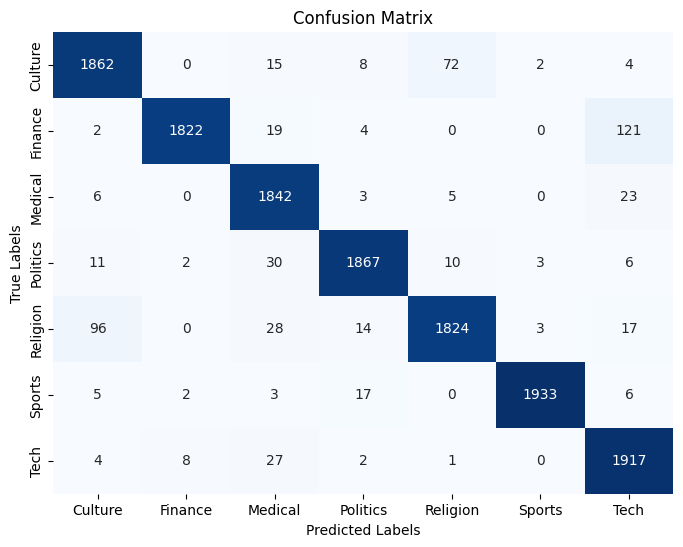

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()